## 30,000+ Movies, 60+ Years of Data, Rich Metadata

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/top-500-600-movies-of-each-year-from-1960-to-2024/final_dataset.csv


In [39]:
data = pd.read_csv("/kaggle/input/top-500-600-movies-of-each-year-from-1960-to-2024/final_dataset.csv")

## Exploring Data Set and Extracting Basic Information

In [40]:
data.head()

,id,Title,Movie Link,Year,Duration,MPA,Rating,Votes,budget,grossWorldWide,...,writers,stars,genres,countries_origin,filming_locations,production_companies,Languages,wins,nominations,oscars
0,tt0073195,Jaws,https://www.imdb.com/title/tt0073195,1975,2h 4m,PG,8.1,683K,7000000.0,477220580.0,...,"['Peter Benchley', 'Carl Gottlieb']","['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...","['Monster Horror', 'Sea Adventure', 'Survival'...",['United States'],"[""Water Street, Edgartown, Martha's Vineyard, ...","['Zanuck/Brown Productions', 'Universal Pictur...",['English'],0,20,0
1,tt0073629,The Rocky Horror Picture Show,https://www.imdb.com/title/tt0073629,1975,1h 40m,R,7.4,173K,1200000.0,115798478.0,...,"[""Richard O'Brien"", 'Jim Sharman']","['Tim Curry', 'Susan Sarandon', 'Barry Bostwick']","['Dark Comedy', 'Raunchy Comedy', 'Rock Musica...","['United Kingdom', 'United States']","['Oakley Court, Windsor Road, Oakley Green, Wi...","['Twentieth Century Fox', 'Michael White Produ...",['English'],0,4,0
2,tt0073486,One Flew Over the Cuckoo's Nest,https://www.imdb.com/title/tt0073486,1975,2h 13m,R,8.7,1.1M,3000000.0,109115366.0,...,"['Lawrence Hauben', 'Bo Goldman', 'Ken Kesey']","['Jack Nicholson', 'Louise Fletcher', 'Michael...","['Medical Drama', 'Psychological Drama', 'Drama']",['United States'],['Oregon State Mental Hospital - 2600 Center S...,"['Fantasy Films', 'N.V. Zvaluw']",['English'],0,15,0
3,tt0072890,Dog Day Afternoon,https://www.imdb.com/title/tt0072890,1975,2h 5m,R,8.0,279K,1800000.0,50002721.0,...,"['Frank Pierson', 'P.F. Kluge', 'Thomas Moore']","['Al Pacino', 'John Cazale', 'Penelope Allen']","['Heist', 'True Crime', 'Biography', 'Crime', ...",['United States'],"['285 Prospect Park West, Brooklyn, New York C...","['Warner Bros.', 'Artists Entertainment Complex']",['English'],0,20,0
4,tt0073692,Shampoo,https://www.imdb.com/title/tt0073692,1975,1h 50m,R,6.4,15K,4000000.0,49407734.0,...,"['Robert Towne', 'Warren Beatty']","['Warren Beatty', 'Julie Christie', 'Goldie Ha...","['Satire', 'Comedy', 'Drama']",['United States'],"['2270 Bowmont Drive, Beverly Hills, Californi...","['Persky-Bright / Vista', 'Columbia Pictures',...",['English'],0,11,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33379 non-null  object 
 5   MPA                    25624 non-null  object 
 6   Rating                 33462 non-null  float64
 7   Votes                  33462 non-null  object 
 8   budget                 11815 non-null  float64
 9   grossWorldWide         18222 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33241 non-null  object 
 13  writers                32024 non-null  object 
 14  stars                  33127 non-null  object 
 15  ge

In [42]:
data.isnull().sum()


id                           0
Title                        0
Movie Link                   0
Year                         0
Duration                   221
MPA                       7976
Rating                     138
Votes                      138
budget                   21785
grossWorldWide           15378
gross_US_Canada          16029
opening_weekend_Gross    18077
directors                  359
writers                   1576
stars                      473
genres                     382
countries_origin           366
filming_locations         6729
production_companies      1378
Languages                  474
wins                         0
nominations                  0
oscars                       0
dtype: int64

In [43]:
data.describe()

,Year,Rating,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,wins,nominations,oscars
count,33600.000000,33462.000000,1.181500e+04,1.822200e+04,1.757100e+04,1.552300e+04,33600.0,33600.000000,33600.000000
mean,1992.393631,6.155158,8.454320e+07,3.814961e+07,1.808236e+07,5.110082e+06,0.0,4.850357,0.102619
std,18.957395,1.146070,2.866281e+09,1.210105e+08,4.853181e+07,1.488319e+07,0.0,17.719188,0.508687
min,1960.000000,1.100000,1.000000e+00,1.000000e+00,6.400000e+01,1.100000e+01,0.0,0.000000,0.000000
25%,1976.000000,5.500000,2.000000e+06,1.589938e+05,8.603650e+04,1.399650e+04,0.0,0.000000,0.000000
50%,1993.000000,6.300000,9.000000e+06,2.311544e+06,9.094110e+05,1.075360e+05,0.0,0.000000,0.000000
75%,2009.000000,7.000000,2.700000e+07,2.092931e+07,1.405137e+07,3.772558e+06,0.0,3.000000,0.000000
max,2024.000000,9.600000,3.000000e+11,2.923706e+09,9.366622e+08,3.571150e+08,0.0,433.000000,11.000000


In [44]:
data.nunique()

id                       33600
Title                    31935
Movie Link               33600
Year                        65
Duration                   230
MPA                         26
Rating                      86
Votes                     1758
budget                    1140
grossWorldWide           18033
gross_US_Canada          17211
opening_weekend_Gross    14751
directors                14520
writers                  27123
stars                    32812
genres                    8540
countries_origin          2938
filming_locations        12383
production_companies     25940
Languages                 2709
wins                         1
nominations                220
oscars                      12
dtype: int64

In [45]:
data.columns

Index(['id', 'Title', 'Movie Link', 'Year', 'Duration', 'MPA', 'Rating',
       'Votes', 'budget', 'grossWorldWide', 'gross_US_Canada',
       'opening_weekend_Gross', 'directors', 'writers', 'stars', 'genres',
       'countries_origin', 'filming_locations', 'production_companies',
       'Languages', 'wins', 'nominations', 'oscars'],
      dtype='object')

## Data Cleaning:
#### Convert data types where necessary (e.g., Votes).
#### Handle missing values, especially in columns like budget, grossWorldWide, etc.

In [46]:
# Convert Votes to numeric
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

In [47]:
# Convert Duration to numeric (extracting numbers only)
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

## Handle Missing Values
#### Check for Missing Values
#### Fill Missing Values


In [48]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

Duration                   224
MPA                       7976
Rating                     138
Votes                    21362
budget                   21785
grossWorldWide           15378
gross_US_Canada          16029
opening_weekend_Gross    18077
directors                  359
writers                   1576
stars                      473
genres                     382
countries_origin           366
filming_locations         6729
production_companies      1378
Languages                  474
dtype: int64


In [49]:
# Fill missing budget with 0 or the median
data['budget'] = data['budget'].fillna(0)  
# Fill missing grossWorldWide with 0 or the median
data['grossWorldWide'] = data['grossWorldWide'].fillna(0)  

In [50]:
# Fill missing Ratings with the mean or median
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())

In [51]:
# Fill missing categorical columns with 'Unknown'
categorical_columns = ['MPA', 'directors', 'writers', 'stars', 'genres', 
                       'countries_origin', 'filming_locations', 
                       'production_companies', 'Languages']

for col in categorical_columns:
    data[col] = data[col].fillna('Unknown')

In [52]:
# Convert infinite values to NaN
data['Rating'] = data['Rating'].replace([float('inf'), -float('inf')], pd.NA)

# Optional: Drop or fill NaN values in Rating
data['Rating'].dropna(inplace=True)

In [53]:
# Check the data types and missing values after cleaning
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33600 non-null  object 
 1   Title                  33600 non-null  object 
 2   Movie Link             33600 non-null  object 
 3   Year                   33600 non-null  int64  
 4   Duration               33376 non-null  float64
 5   MPA                    33600 non-null  object 
 6   Rating                 33600 non-null  float64
 7   Votes                  12238 non-null  float64
 8   budget                 33600 non-null  float64
 9   grossWorldWide         33600 non-null  float64
 10  gross_US_Canada        17571 non-null  float64
 11  opening_weekend_Gross  15523 non-null  float64
 12  directors              33600 non-null  object 
 13  writers                33600 non-null  object 
 14  stars                  33600 non-null  object 
 15  ge

## Statistical Analysis
### Descriptive Statistics:
#### Calculate and display the mean, median, standard deviation, and range for key numerical columns like Rating, Votes, budget, grossWorldWide, etc. This helps summarize the data.

In [54]:
descriptive_stats = data[['Rating', 'Votes', 'budget', 'grossWorldWide']].describe()
print(descriptive_stats)

             Rating         Votes        budget  grossWorldWide
count  33600.000000  12238.000000  3.360000e+04    3.360000e+04
mean       6.155158    388.584409  2.972851e+07    2.068935e+07
std        1.143714    276.500050  1.700108e+09    9.111835e+07
min        1.100000      6.000000  0.000000e+00    0.000000e+00
25%        5.500000    149.000000  0.000000e+00    0.000000e+00
50%        6.300000    331.000000  0.000000e+00    1.469300e+04
75%        7.000000    597.000000  3.000000e+06    3.408386e+06
max        9.600000    999.000000  3.000000e+11    2.923706e+09


### Correlation Analysis:
#### Calculate the correlation matrix to identify relationships between numeric variables, such as budget, grossWorldWide, and Rating.

In [55]:
correlation_matrix = data[['Rating', 'Votes', 'budget', 'grossWorldWide']].corr()
print(correlation_matrix)

                  Rating     Votes    budget  grossWorldWide
Rating          1.000000 -0.003624  0.009764        0.120307
Votes          -0.003624  1.000000 -0.006823        0.056839
budget          0.009764 -0.006823  1.000000        0.011849
grossWorldWide  0.120307  0.056839  0.011849        1.000000


### Group By Analysis:
#### Group data by Year or MPA to analyze trends over time or the impact of movie ratings on revenue.

In [56]:
yearly_analysis = data.groupby('Year')[['grossWorldWide', 'budget', 'Rating']].mean()

### Winning Percentages:
#### Calculate the percentage of nominations that resulted in wins for each movie.

In [57]:
data['win_percentage'] = (data['wins'] / data['nominations']).fillna(0)

### Genre Analysis:

#### Analyze average ratings and gross earnings by genre, providing insights into which genres perform best.

In [58]:
genre_performance = data.groupby('genres')[['Rating', 'grossWorldWide']].mean().sort_values(by='grossWorldWide', ascending=False)


## Visualizations
### Histograms:

#### Visualize the distribution of Rating, Votes, budget, and grossWorldWide using histograms.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


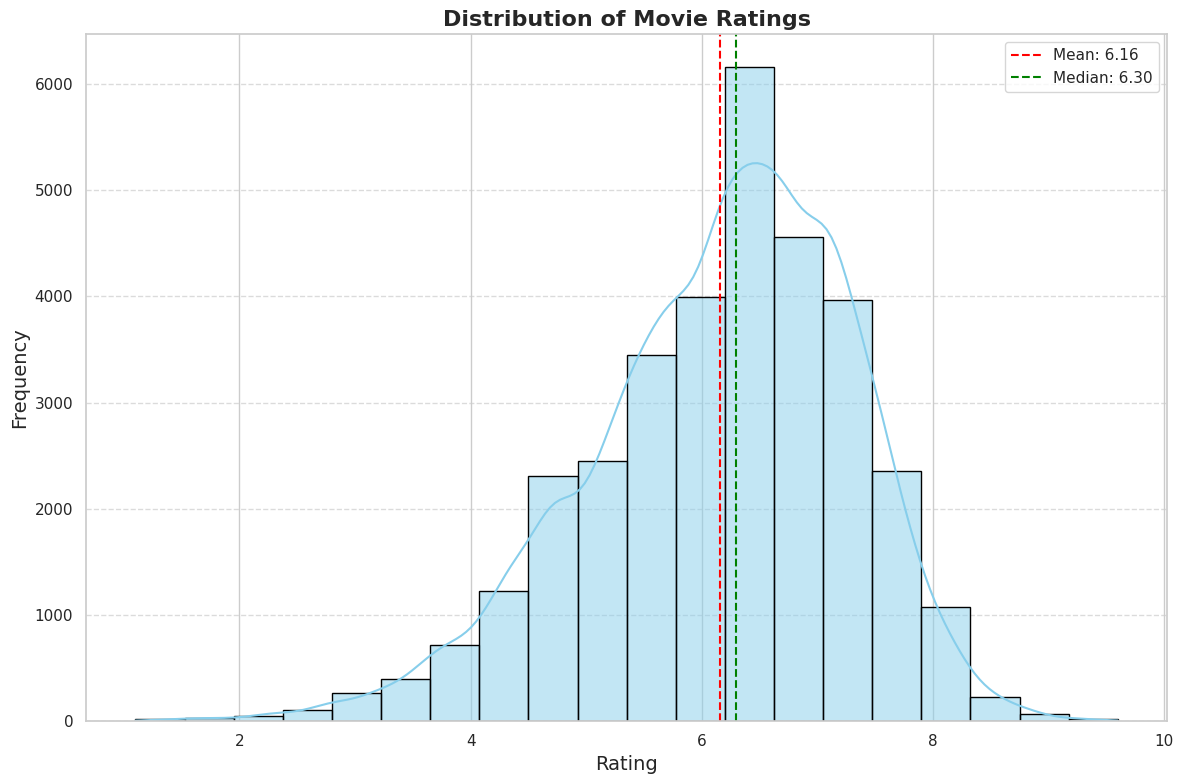

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/top-500-600-movies-of-each-year-from-1960-to-2024/final_dataset.csv")

# Convert infinite values to NaN and drop them
data['Rating'] = data['Rating'].replace([float('inf'), -float('inf')], pd.NA)
data['Rating'].dropna(inplace=True)  # Drop NaN values

# Calculate mean and median
mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Create a histogram with kernel density estimate (KDE)
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Movie Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate mean and median on the plot
plt.axvline(mean_rating, color='red', linestyle='--', label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='--', label=f'Median: {median_rating:.2f}')

# Adding the legend to the plot
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Box Plots:

#### Compare the distribution of grossWorldWide across different MPA ratings using box plots.

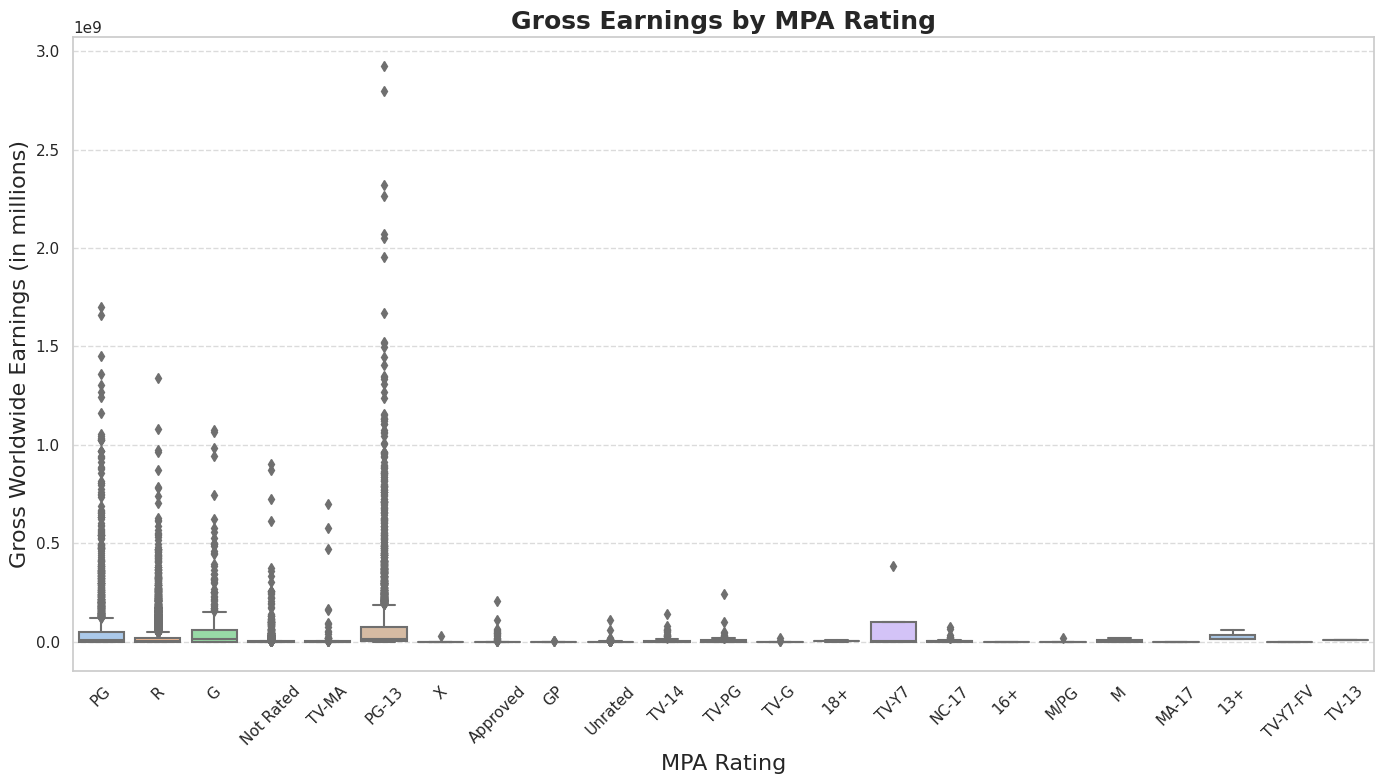

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/top-500-600-movies-of-each-year-from-1960-to-2024/final_dataset.csv")

# Clean the data by dropping rows with NaN values in 'MPA' or 'grossWorldWide'
data = data.dropna(subset=['MPA', 'grossWorldWide'])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 8))

# Create a box plot with custom palette
sns.boxplot(x='MPA', y='grossWorldWide', data=data, palette='pastel')

# Adding titles and labels
plt.title('Gross Earnings by MPA Rating', fontsize=18, fontweight='bold')
plt.xlabel('MPA Rating', fontsize=16)
plt.ylabel('Gross Worldwide Earnings (in millions)', fontsize=16)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Scatter Plots:

#### Create scatter plots to visualize relationships, such as between budget and grossWorldWide or Rating and Votes.

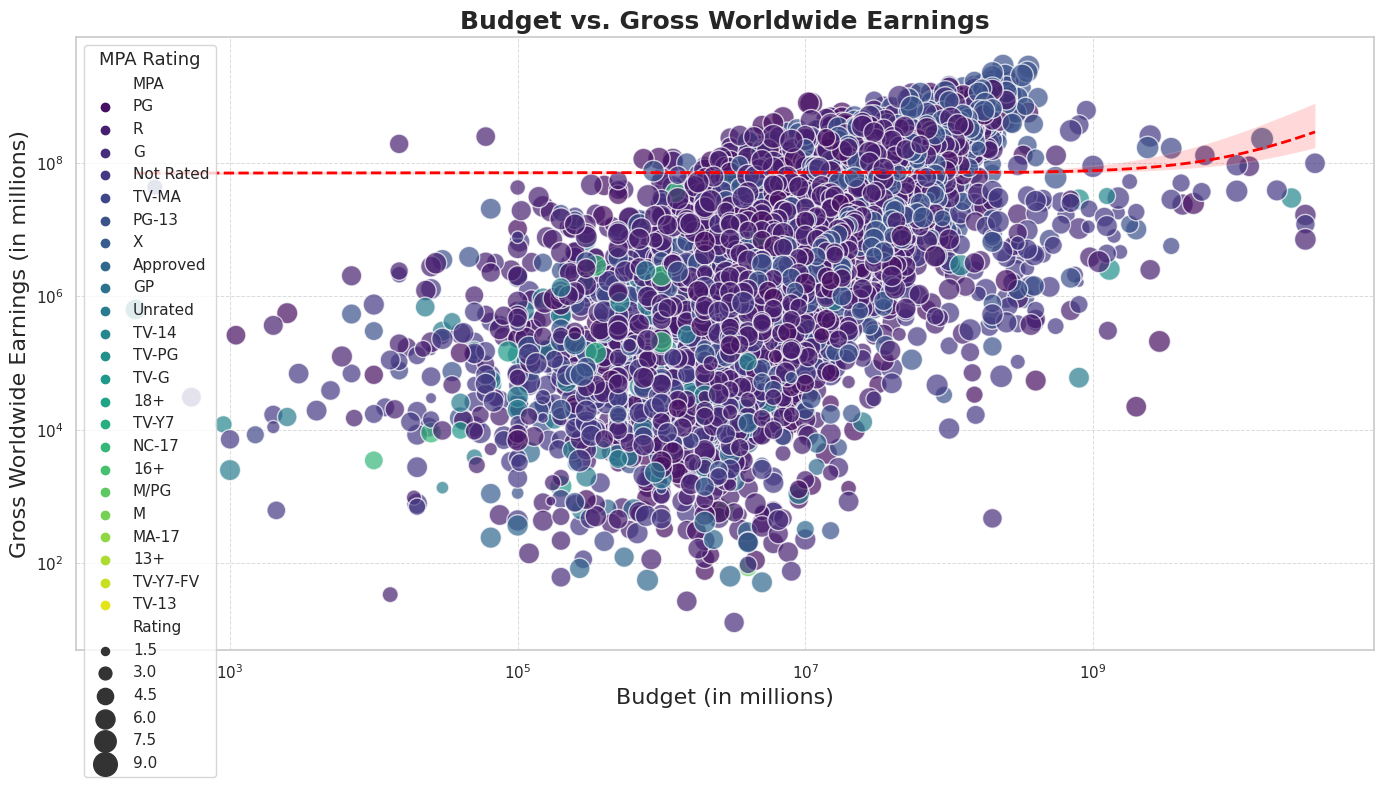

In [61]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 8))

# Create a scatter plot with logarithmic scale
sns.scatterplot(x='budget', y='grossWorldWide', data=data, hue='MPA', palette='viridis', 
                size='Rating', sizes=(20, 300), legend='brief', alpha=0.7)

# Adding a regression line
sns.regplot(x='budget', y='grossWorldWide', data=data, scatter=False, color='red', 
            line_kws={"linestyle": "--", "linewidth": 2})

# Adding titles and labels
plt.title('Budget vs. Gross Worldwide Earnings', fontsize=18, fontweight='bold')
plt.xlabel('Budget (in millions)', fontsize=16)
plt.ylabel('Gross Worldwide Earnings (in millions)', fontsize=16)

# Set log scale for both axes for better visibility
plt.xscale('log')
plt.yscale('log')

# Add a legend for movie ratings
plt.legend(title='MPA Rating', title_fontsize='13', fontsize='11')

# Add gridlines for better readability
plt.grid(True, which="both", linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Line Graphs:

#### Plot the average grossWorldWide over the years to see trends in box office performance.

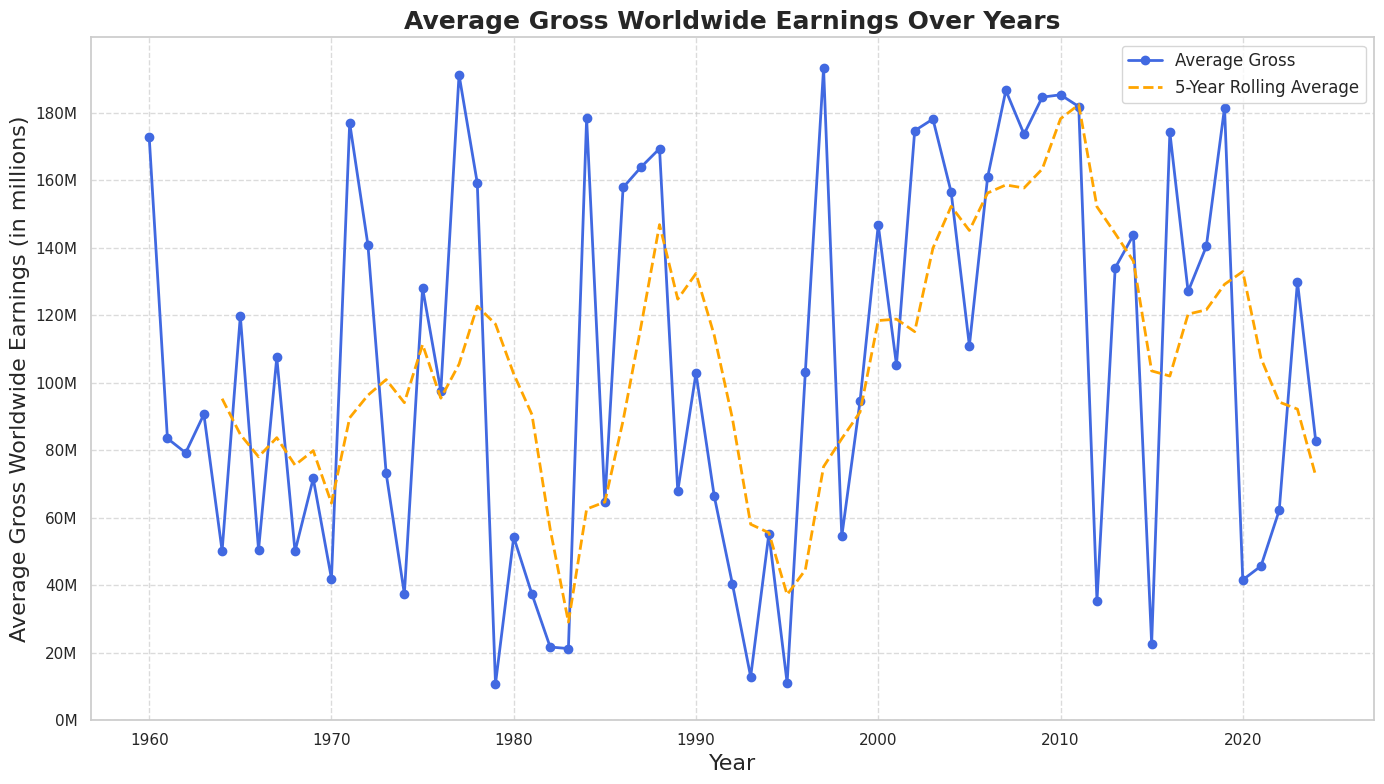

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming yearly_analysis is already created and contains average gross earnings per year
# For demonstration, let's create a sample 'yearly_analysis' DataFrame
years = list(range(1960, 2025))
average_gross = np.random.randint(500000, 200000000, size=len(years))  # Sample data
yearly_analysis = pd.DataFrame({'Year': years, 'grossWorldWide': average_gross})

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the average gross worldwide earnings with markers
plt.plot(yearly_analysis['Year'], yearly_analysis['grossWorldWide'], marker='o', 
         linestyle='-', color='royalblue', linewidth=2, markersize=6, label='Average Gross')

# Add a rolling average for smoothing
yearly_analysis['rolling_average'] = yearly_analysis['grossWorldWide'].rolling(window=5).mean()
plt.plot(yearly_analysis['Year'], yearly_analysis['rolling_average'], color='orange', 
         linewidth=2, label='5-Year Rolling Average', linestyle='--')

# Adding titles and labels
plt.title('Average Gross Worldwide Earnings Over Years', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Gross Worldwide Earnings (in millions)', fontsize=16)

# Customize the y-axis to show in millions
plt.yticks(ticks=range(0, int(yearly_analysis['grossWorldWide'].max()), 20000000), 
           labels=[f'{int(x/1000000)}M' for x in range(0, int(yearly_analysis['grossWorldWide'].max()), 20000000)])

# Add a legend
plt.legend(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Pie Charts:

#### Visualize the share of total gross earnings by genre or MPA rating using pie charts.

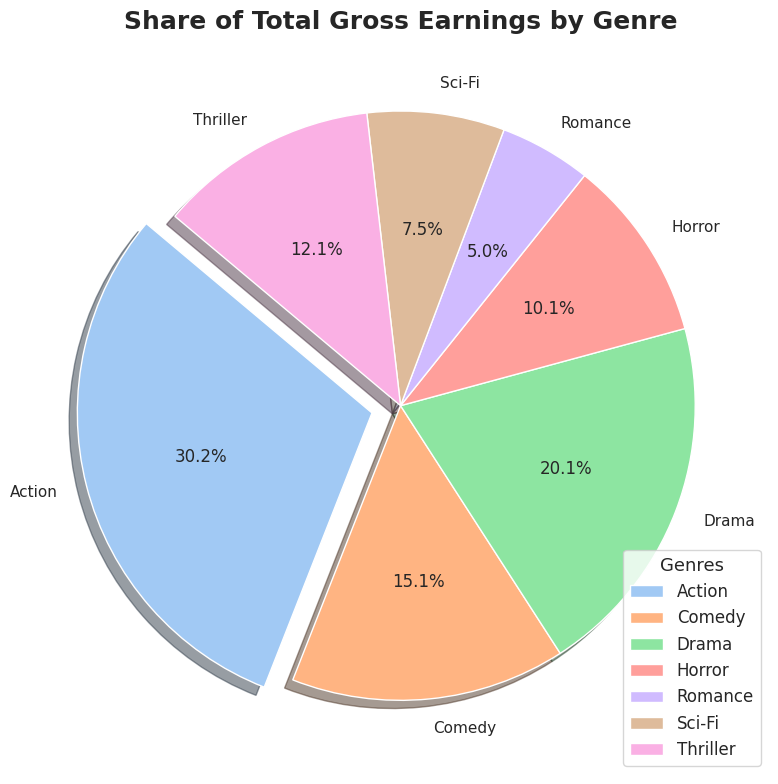

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming genre_performance is already created and contains total gross earnings by genre
# For demonstration, let's create a sample 'genre_performance' DataFrame
genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']
gross_earnings = [300000000, 150000000, 200000000, 100000000, 50000000, 75000000, 120000000]  # Sample data
genre_performance = pd.DataFrame({'Genre': genres, 'grossWorldWide': gross_earnings})

# Set the figure size
plt.figure(figsize=(12, 8))

# Explode the first slice (Action) for emphasis
explode = [0.1] + [0] * (len(genre_performance) - 1)

# Create the pie chart
plt.pie(genre_performance['grossWorldWide'], labels=genre_performance['Genre'], 
        autopct='%1.1f%%', startangle=140, explode=explode, 
        colors=sns.color_palette('pastel'), shadow=True)

# Add title and remove y-label
plt.title('Share of Total Gross Earnings by Genre', fontsize=18, fontweight='bold')
plt.ylabel('')

# Add a legend
plt.legend(genre_performance['Genre'], title='Genres', fontsize=12, title_fontsize='13')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Histogram:
#### Visualize the number of Movies by Year

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


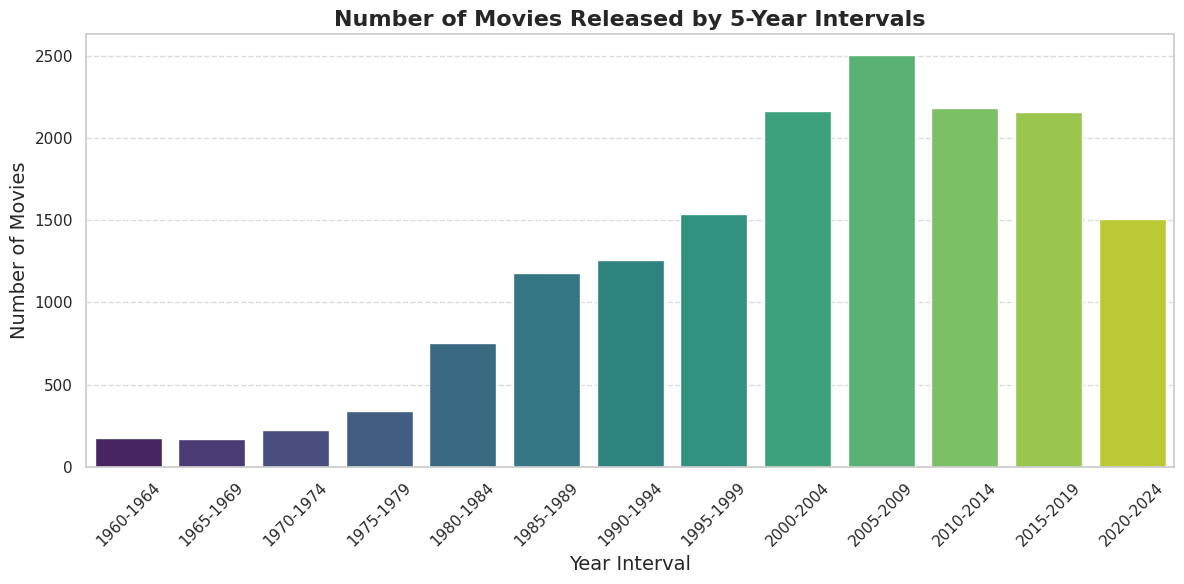

In [64]:
# Assuming 'df' is your DataFrame
unique_years = data['Year'].value_counts().sort_index().index
print(unique_years.tolist())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the movie data

# Create 5-year intervals
bins = range(data['Year'].min(), data['Year'].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Create labels like '1960-1964'

# Cut the data into bins
data['Year Group'] = pd.cut(data['Year'], bins=bins, labels=labels, right=False)

# Count the number of movies in each 5-year interval
year_counts = data['Year Group'].value_counts().sort_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a bar plot for the number of movies per 5-year interval
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

# Adding titles and labels
plt.title('Number of Movies Released by 5-Year Intervals', fontsize=16, fontweight='bold')
plt.xlabel('Year Interval', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Exploratory Data Analysis (EDA) of the Movie Dataset
### Exploratory Data Analysis (EDA) helps us understand the dataset by summarizing its characteristics, detecting patterns, and identifying anomalies. Below is a detailed EDA process, covering data cleaning, summary statistics, visualizations, and insights.




## Comparative Analysis
#### Cinematic Powerhouses: Top 15 Countries Producing the Most Movies

<ipython-input-65-ffdab037bac0>:43: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
<ipython-input-65-ffdab037bac0>:43: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127909 (\N{MOVIE CAMERA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


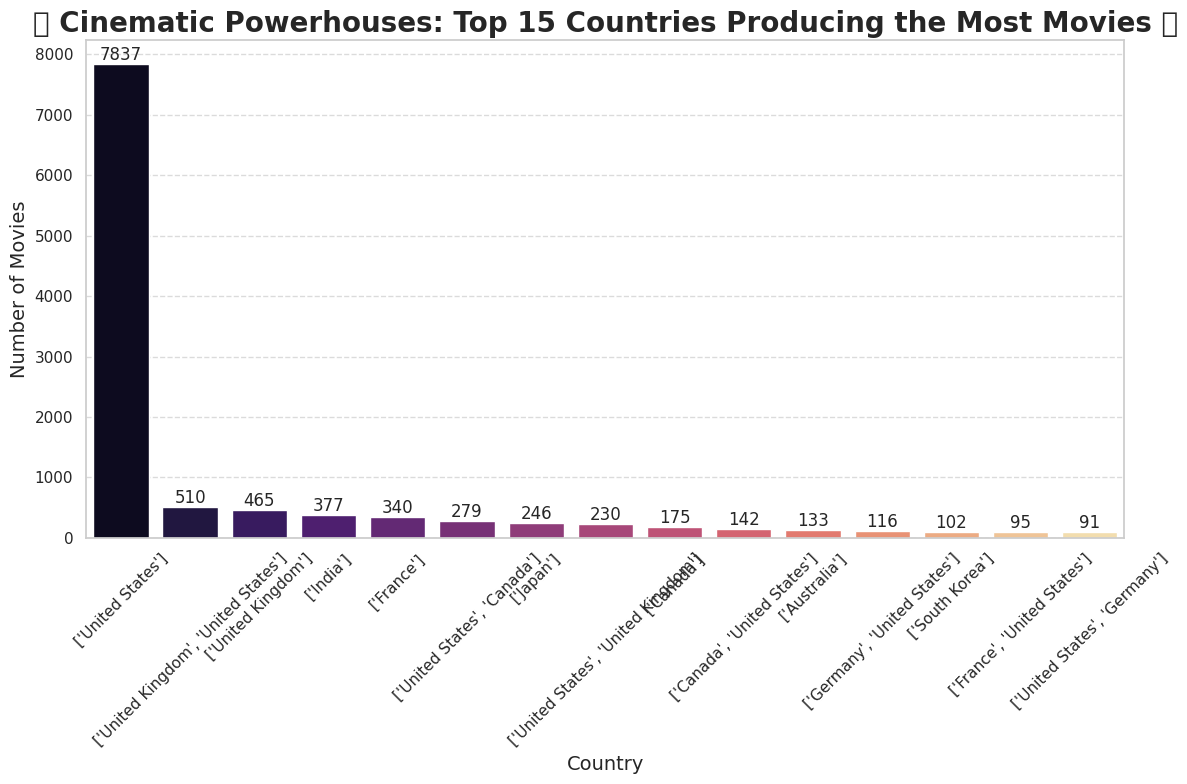

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the movie data

# Group the data by country and count the number of movies
country_counts = data['countries_origin'].value_counts()

# Get the top 15 countries with the most movies
top_15_countries = country_counts.head(15)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 15 countries
bar_plot = sns.barplot(x=top_15_countries.index, y=top_15_countries.values, palette='magma')

# Adding titles and labels
plt.title('🎬 Cinematic Powerhouses: Top 15 Countries Producing the Most Movies 🎥', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Top 15 Movies with Highest Ratings

<ipython-input-66-4a629dd2c5ef>:30: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


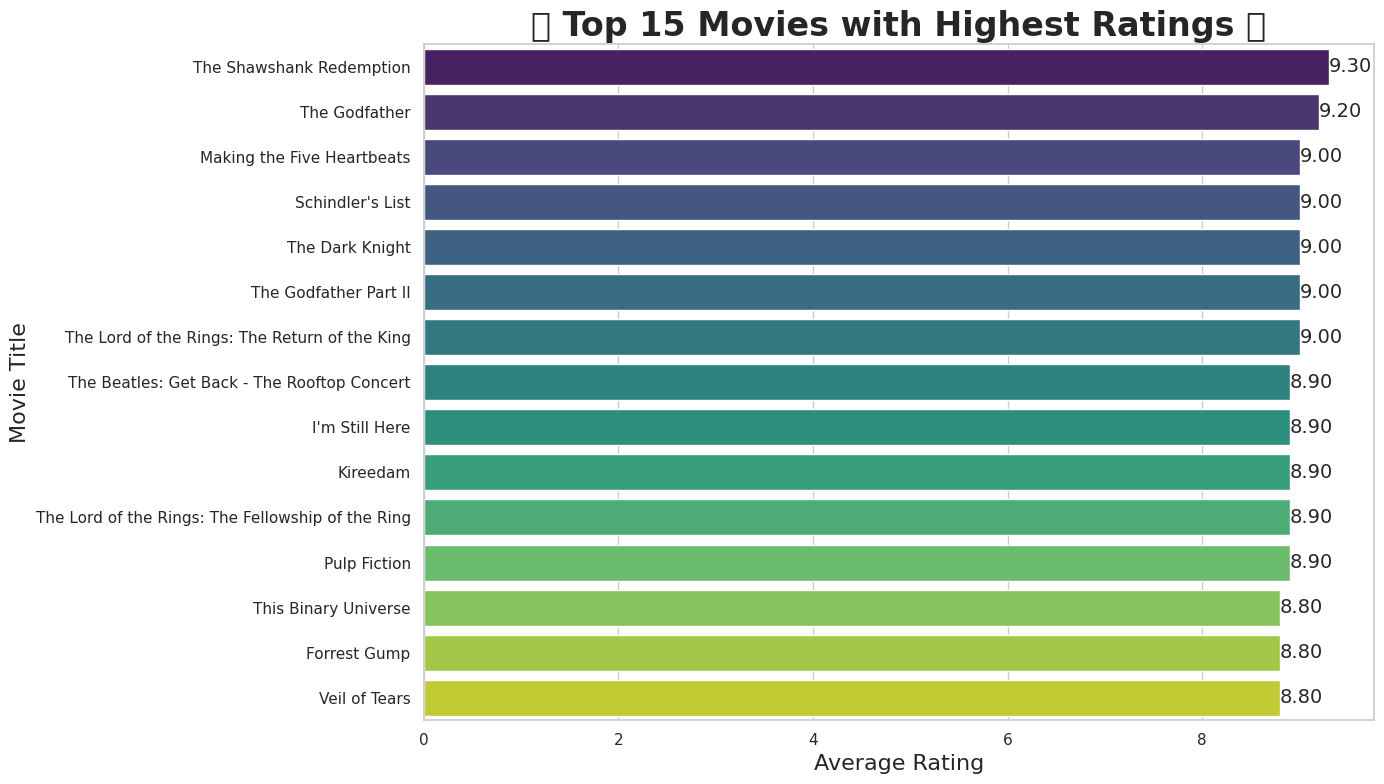

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the movie data

# Step 1: Top 15 Movies by Ratings
top_movies = data[['Title', 'Rating']].sort_values(by='Rating', ascending=False).head(15)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a larger figure for Top 15 Movies
plt.figure(figsize=(14, 8))

# Bar plot for Top 15 Movies
sns.barplot(x='Rating', y='Title', data=top_movies, palette='viridis')

# Adding titles and labels for Top Movies
plt.title('🌟 Top 15 Movies with Highest Ratings 🌟', fontsize=24, fontweight='bold')
plt.xlabel('Average Rating', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

# Add data labels on the bars for Top Movies
for p in plt.gca().patches:
    plt.annotate(f'{p.get_width():.2f}', 
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Top 15 Directors with Most Ratings

<ipython-input-67-c3aff27c55fd>:20: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


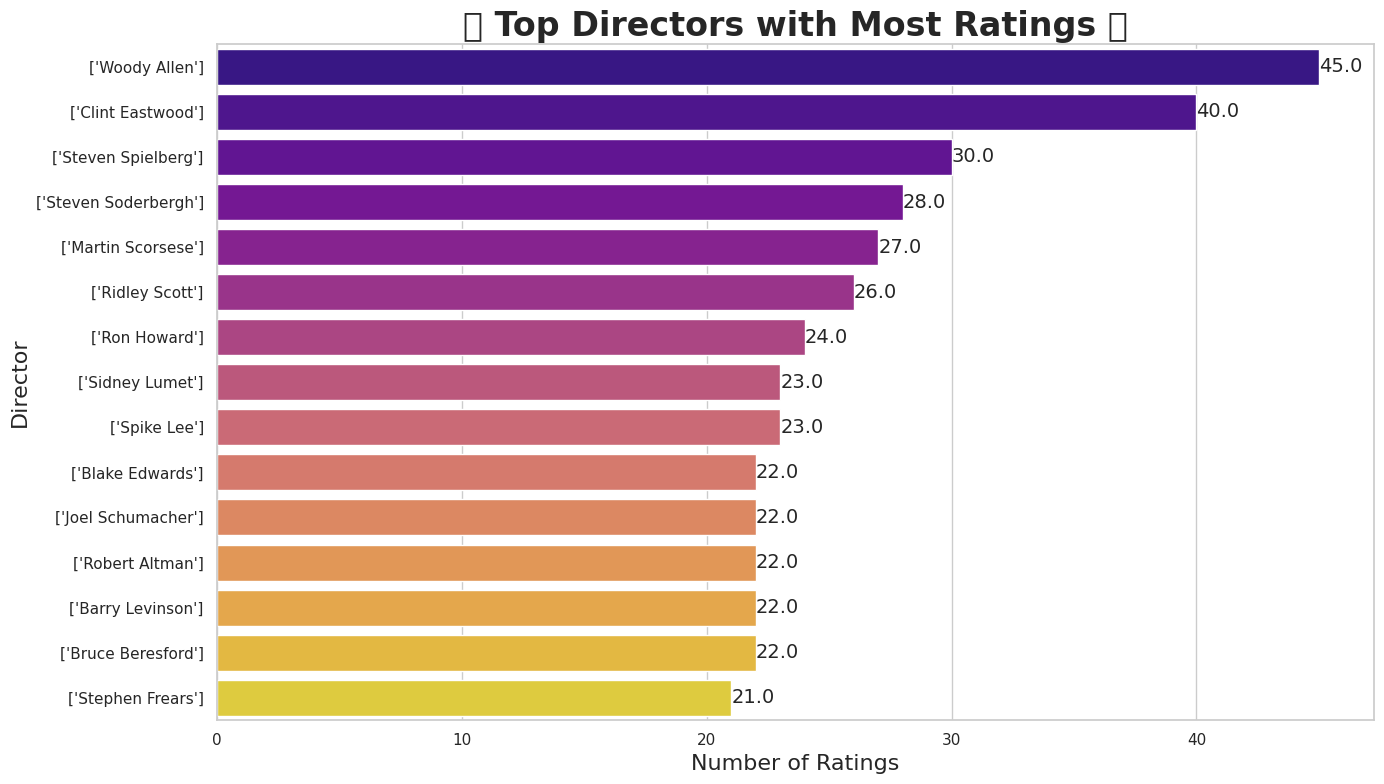

In [67]:
directors_counts = data.explode('directors')['directors'].value_counts().head(15)

# Create a larger figure for Top Directors
plt.figure(figsize=(14, 8))

# Bar plot for Top Directors
sns.barplot(x=directors_counts.values, y=directors_counts.index, palette='plasma')

# Adding titles and labels for Top Directors
plt.title('🎬 Top Directors with Most Ratings 🎬', fontsize=24, fontweight='bold')
plt.xlabel('Number of Ratings', fontsize=16)
plt.ylabel('Director', fontsize=16)

# Add data labels on the bars for Top Directors
for p in plt.gca().patches:
    plt.annotate(f'{p.get_width()}', 
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Top 15 Movies with Highest Gross Worldwide Earnings

<ipython-input-68-6ad0131201a3>:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


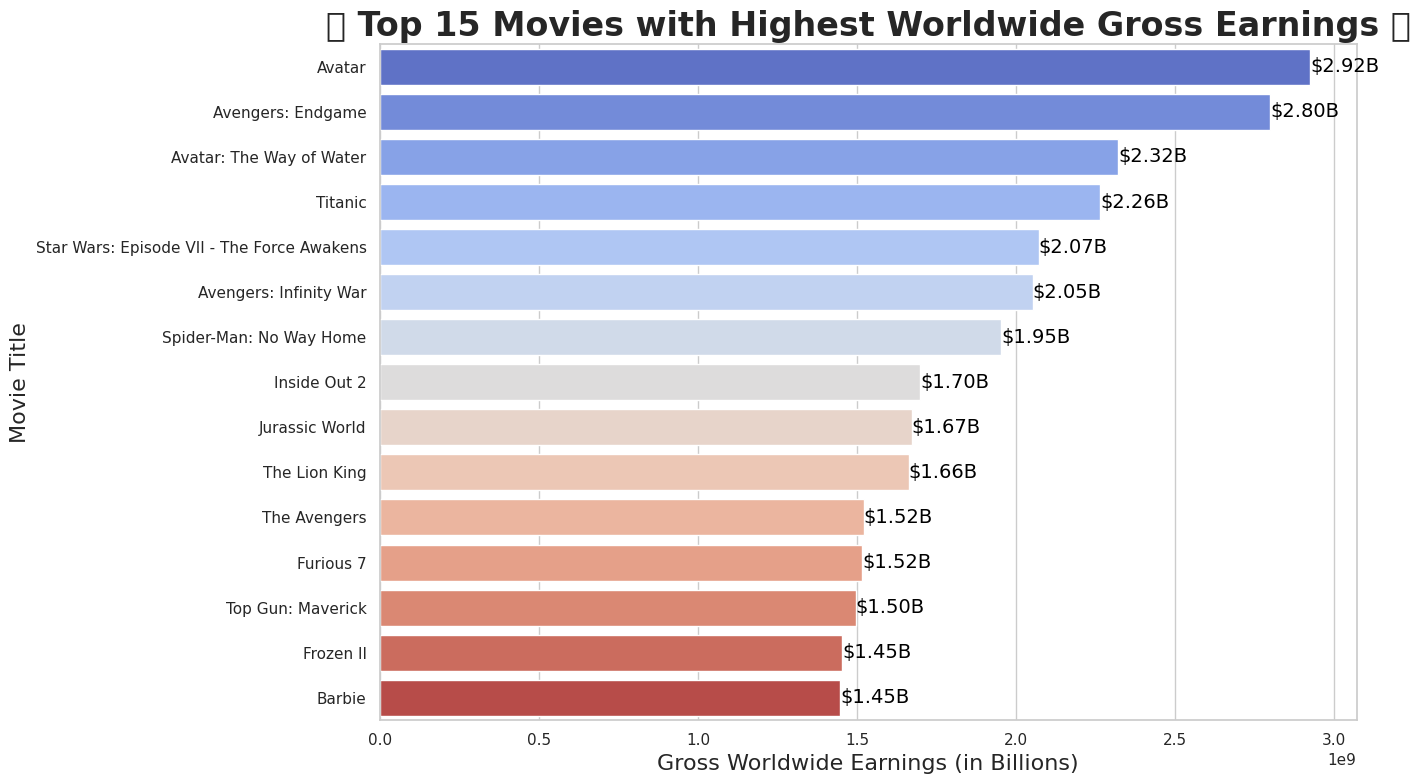

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is sorted correctly
top_grossing_movies = data[['Title', 'grossWorldWide']].dropna().sort_values(by='grossWorldWide', ascending=False).head(15)

# Set the style for a clean visualization
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 8))

# Create a barplot
sns.barplot(x='grossWorldWide', y='Title', data=top_grossing_movies, palette='coolwarm')

# Add chart labels and title
plt.title('💰 Top 15 Movies with Highest Worldwide Gross Earnings 💰', fontsize=24, fontweight='bold')
plt.xlabel('Gross Worldwide Earnings (in Billions)', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'${p.get_width()/1e9:.2f}B',  # Convert to billions
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14, color='black')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Top 15 Genres with Highest Worldwide Gross Earnings

<ipython-input-69-807335721f82>:35: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
<ipython-input-69-807335721f82>:35: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()  # Adjust layout for better spacing
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


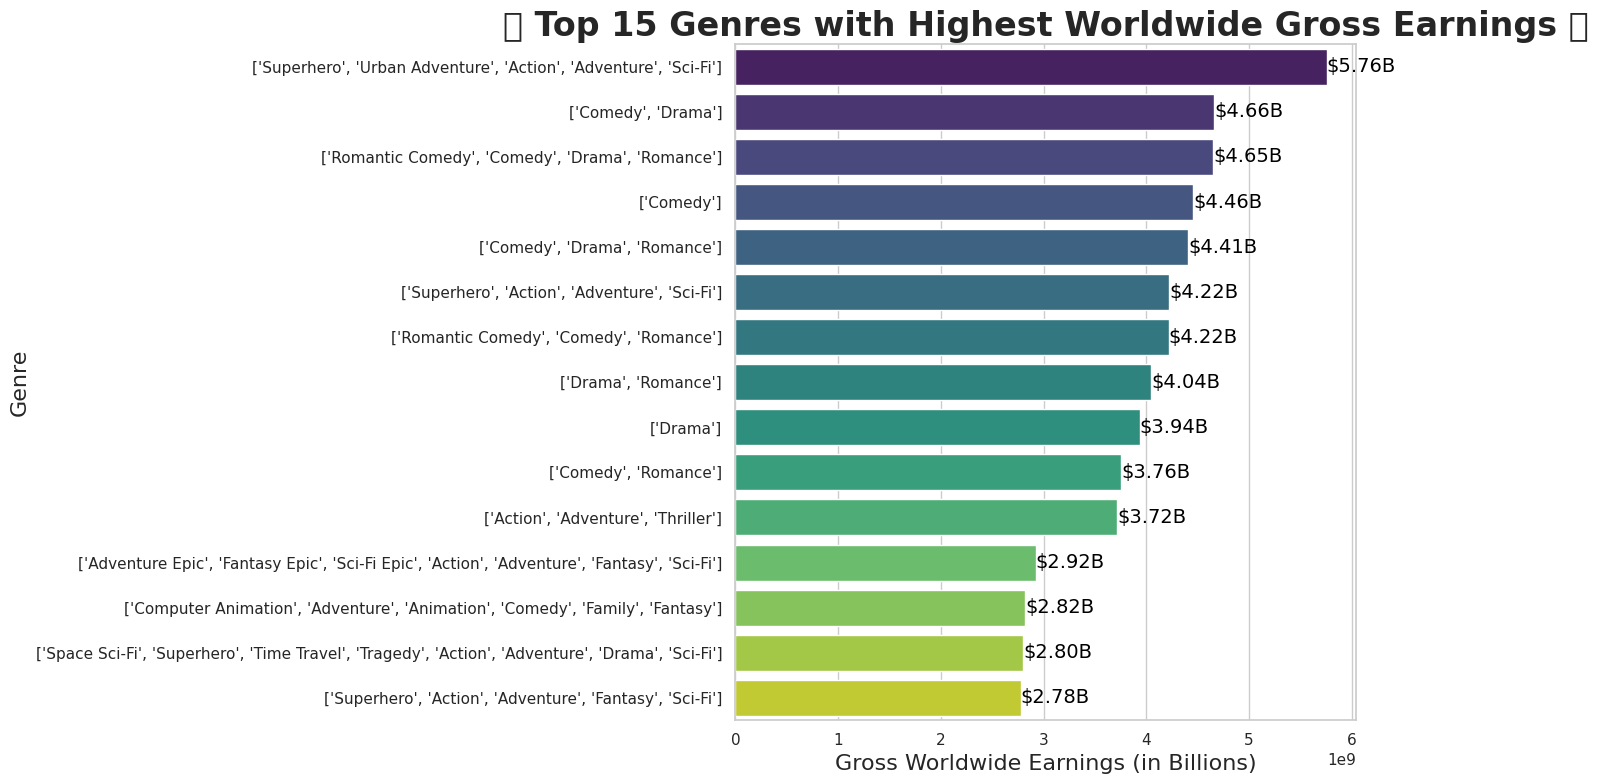

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is sorted correctly
top_grossing_genres = (
    data[['genres', 'grossWorldWide']]
    .dropna()
    .groupby('genres', as_index=False)
    .sum()
    .sort_values(by='grossWorldWide', ascending=False)
    .head(15)
)

# Set the style for a clean visualization
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 8))

# Create a barplot
sns.barplot(x='grossWorldWide', y='genres', data=top_grossing_genres, palette='viridis')

# Add chart labels and title
plt.title('🎬 Top 15 Genres with Highest Worldwide Gross Earnings 💰', fontsize=24, fontweight='bold')
plt.xlabel('Gross Worldwide Earnings (in Billions)', fontsize=16)
plt.ylabel('Genre', fontsize=16)

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'${p.get_width()/1e9:.2f}B',  # Convert to billions
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14, color='black')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Top 15 Production Companies by Worldwide Gross Earnings

<ipython-input-70-3b07de9fe36a>:35: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  plt.tight_layout()  # Adjust layout
<ipython-input-70-3b07de9fe36a>:35: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()  # Adjust layout
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


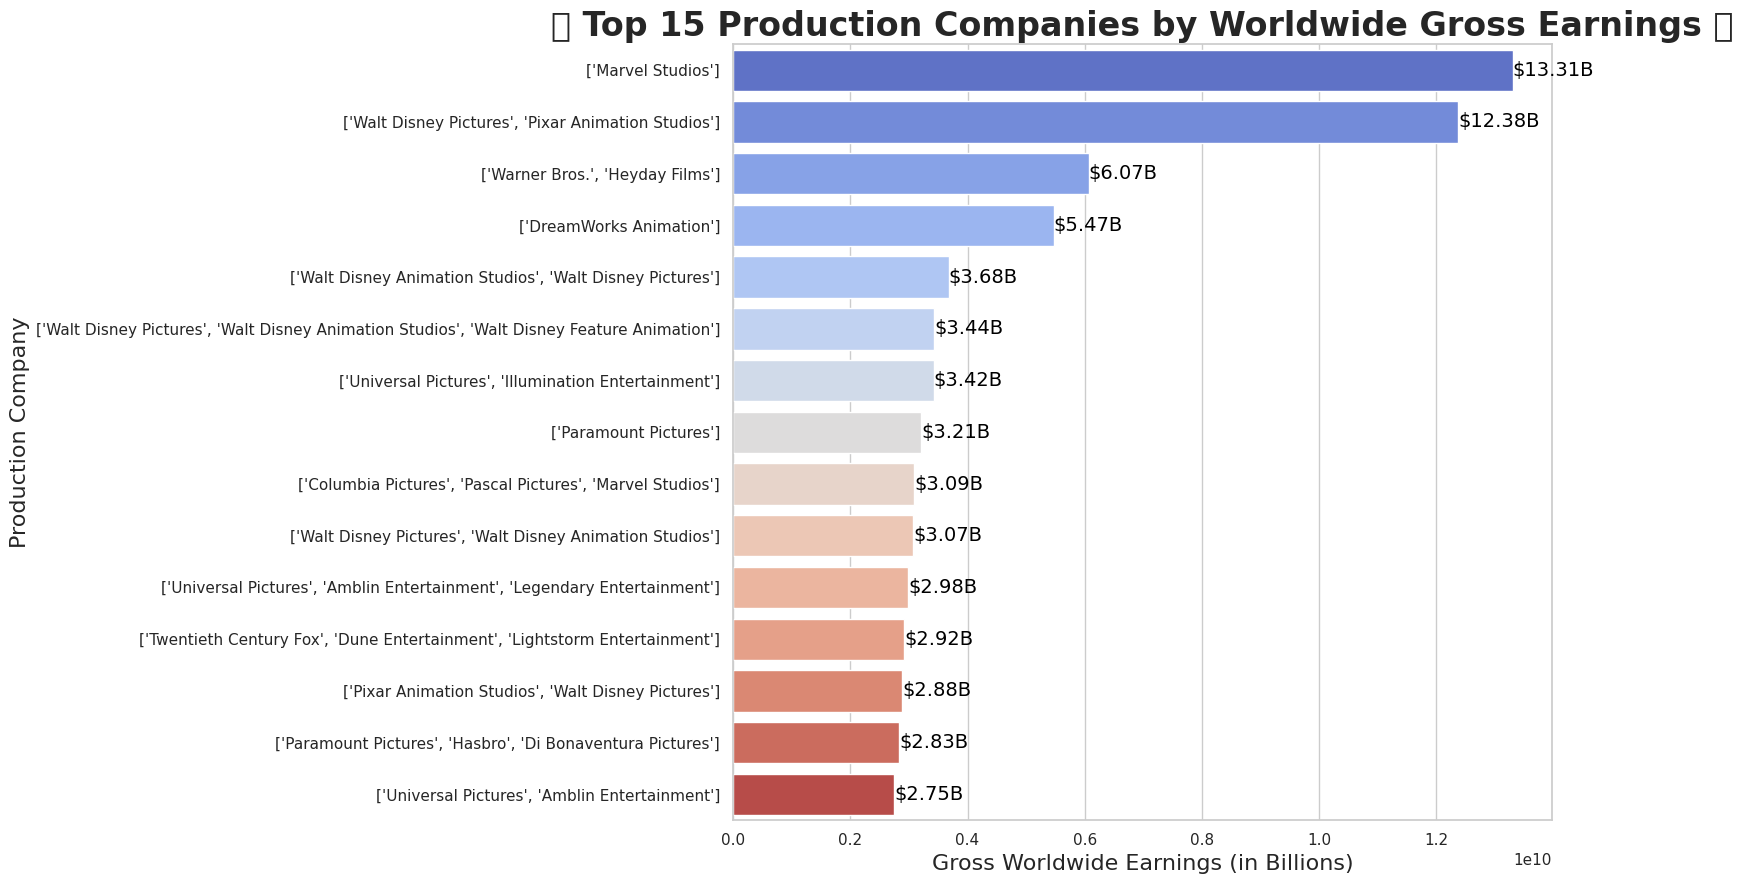

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate and sort data
top_grossing_companies = (
    data[['production_companies', 'grossWorldWide']]
    .dropna()
    .groupby('production_companies', as_index=False)
    .sum()
    .sort_values(by='grossWorldWide', ascending=False)
    .head(15)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(16, 9))

# Create a barplot
sns.barplot(x='grossWorldWide', y='production_companies', data=top_grossing_companies, palette='coolwarm')

# Add title and labels
plt.title('🎬 Top 15 Production Companies by Worldwide Gross Earnings 💰', fontsize=24, fontweight='bold')
plt.xlabel('Gross Worldwide Earnings (in Billions)', fontsize=16)
plt.ylabel('Production Company', fontsize=16)

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'${p.get_width()/1e9:.2f}B',  # Convert to billions
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14, color='black')

plt.tight_layout()  # Adjust layout
plt.show()


## Top 15 Movies by Oscar Wins

<ipython-input-71-baeb8f62485f>:33: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  plt.tight_layout()  # Adjust layout
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


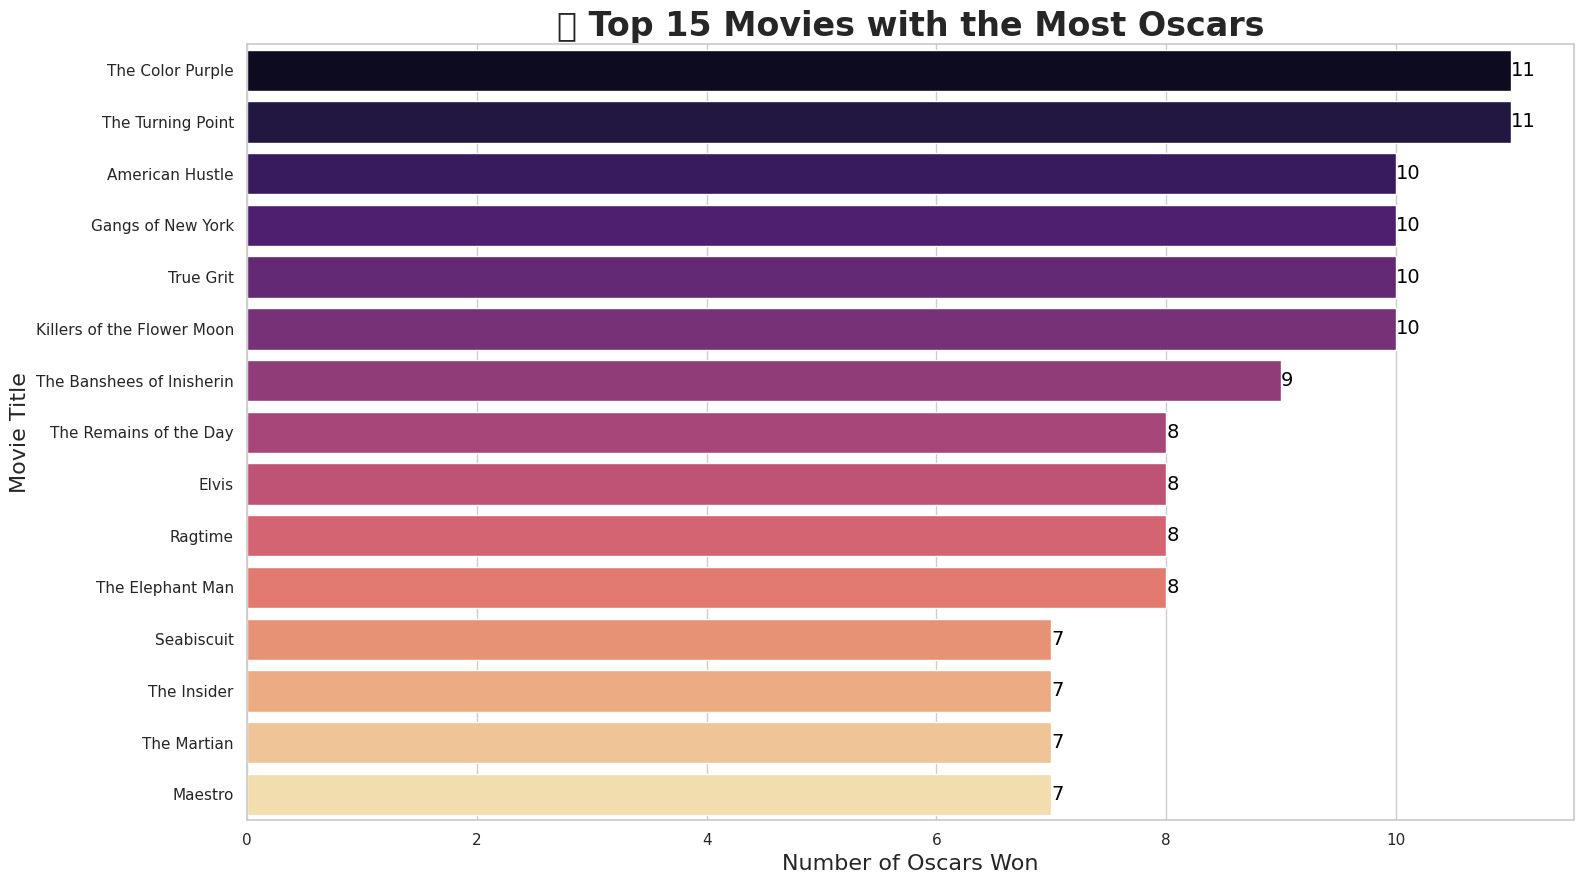

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 15 movies based on Oscar wins
top_oscar_movies = (
    data[['Title', 'oscars']]
    .dropna()
    .sort_values(by='oscars', ascending=False)
    .head(15)
)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(16, 9))

# Create a barplot
sns.barplot(x='oscars', y='Title', data=top_oscar_movies, palette='magma')

# Add title and labels
plt.title('🏆 Top 15 Movies with the Most Oscars', fontsize=24, fontweight='bold')
plt.xlabel('Number of Oscars Won', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

# Add data labels
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_width())}', 
                 (p.get_width(), p.get_y() + p.get_height()/2), 
                 ha='left', va='center', fontsize=14, color='black')

plt.tight_layout()  # Adjust layout
plt.show()


## Budget vs. Gross Worldwide Earnings

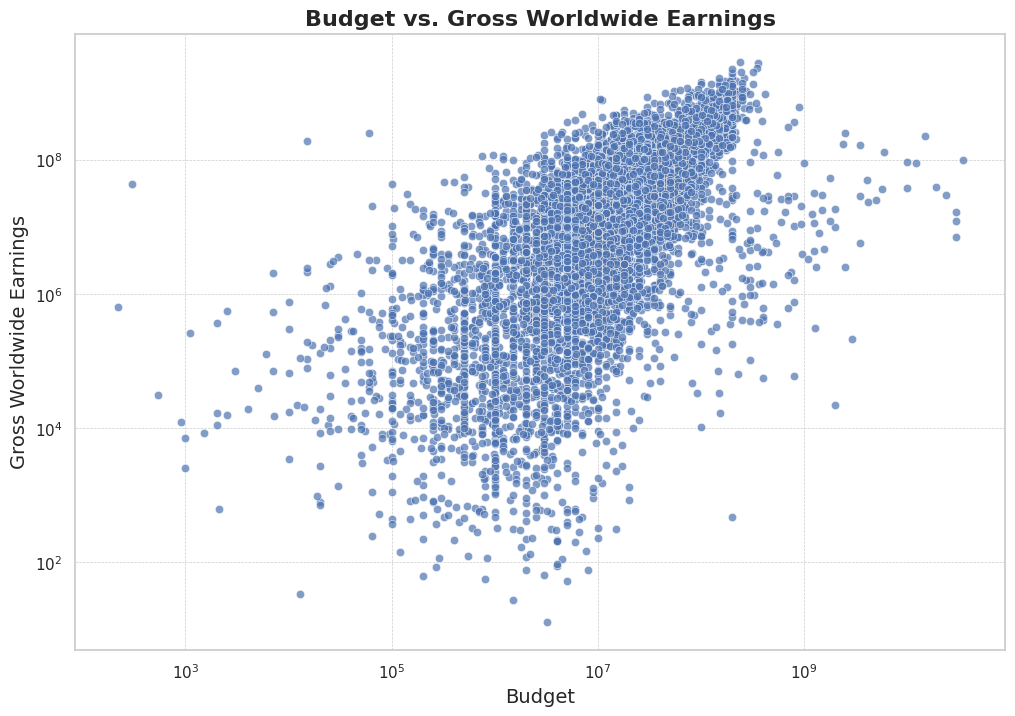

In [72]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='grossWorldWide', data=data, alpha=0.7)

plt.title('Budget vs. Gross Worldwide Earnings', fontsize=16, fontweight='bold')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Gross Worldwide Earnings', fontsize=14)
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


## Gross Worldwide Earnings by MPA Rating

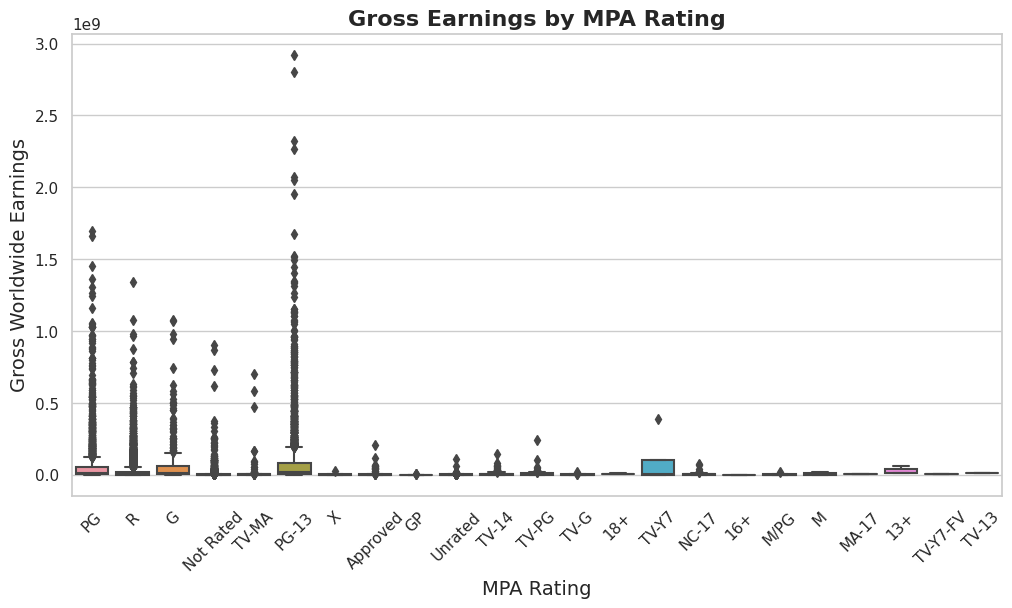

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MPA', y='grossWorldWide', data=data)

plt.title('Gross Earnings by MPA Rating', fontsize=16, fontweight='bold')
plt.xlabel('MPA Rating', fontsize=14)
plt.ylabel('Gross Worldwide Earnings', fontsize=14)
plt.xticks(rotation=45)
plt.show()


## Top 15 Movies with Highest Worldwide Gross Earnings

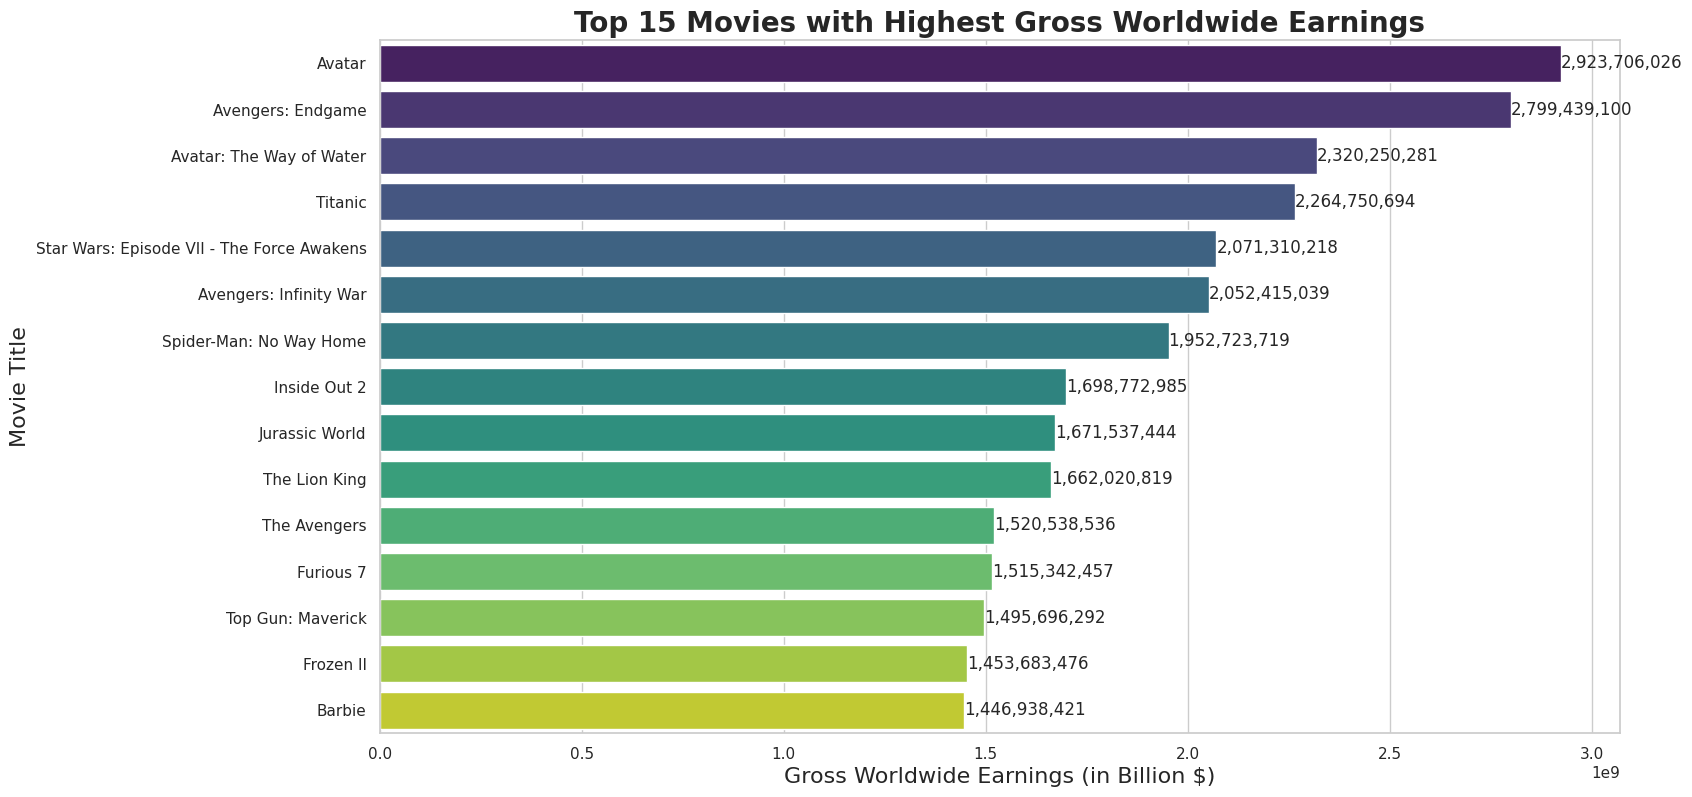

In [74]:
top_grossing_movies = data[['Title', 'grossWorldWide']].dropna().sort_values(by='grossWorldWide', ascending=False).head(15)

plt.figure(figsize=(16, 9))
sns.barplot(x='grossWorldWide', y='Title', data=top_grossing_movies, palette='viridis')

plt.title('Top 15 Movies with Highest Gross Worldwide Earnings', fontsize=20, fontweight='bold')
plt.xlabel('Gross Worldwide Earnings (in Billion $)', fontsize=16)
plt.ylabel('Movie Title', fontsize=16)

for p in plt.gca().patches:
    plt.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center', fontsize=12)

plt.show()


## Top 15 Production Companies by Gross Earnings

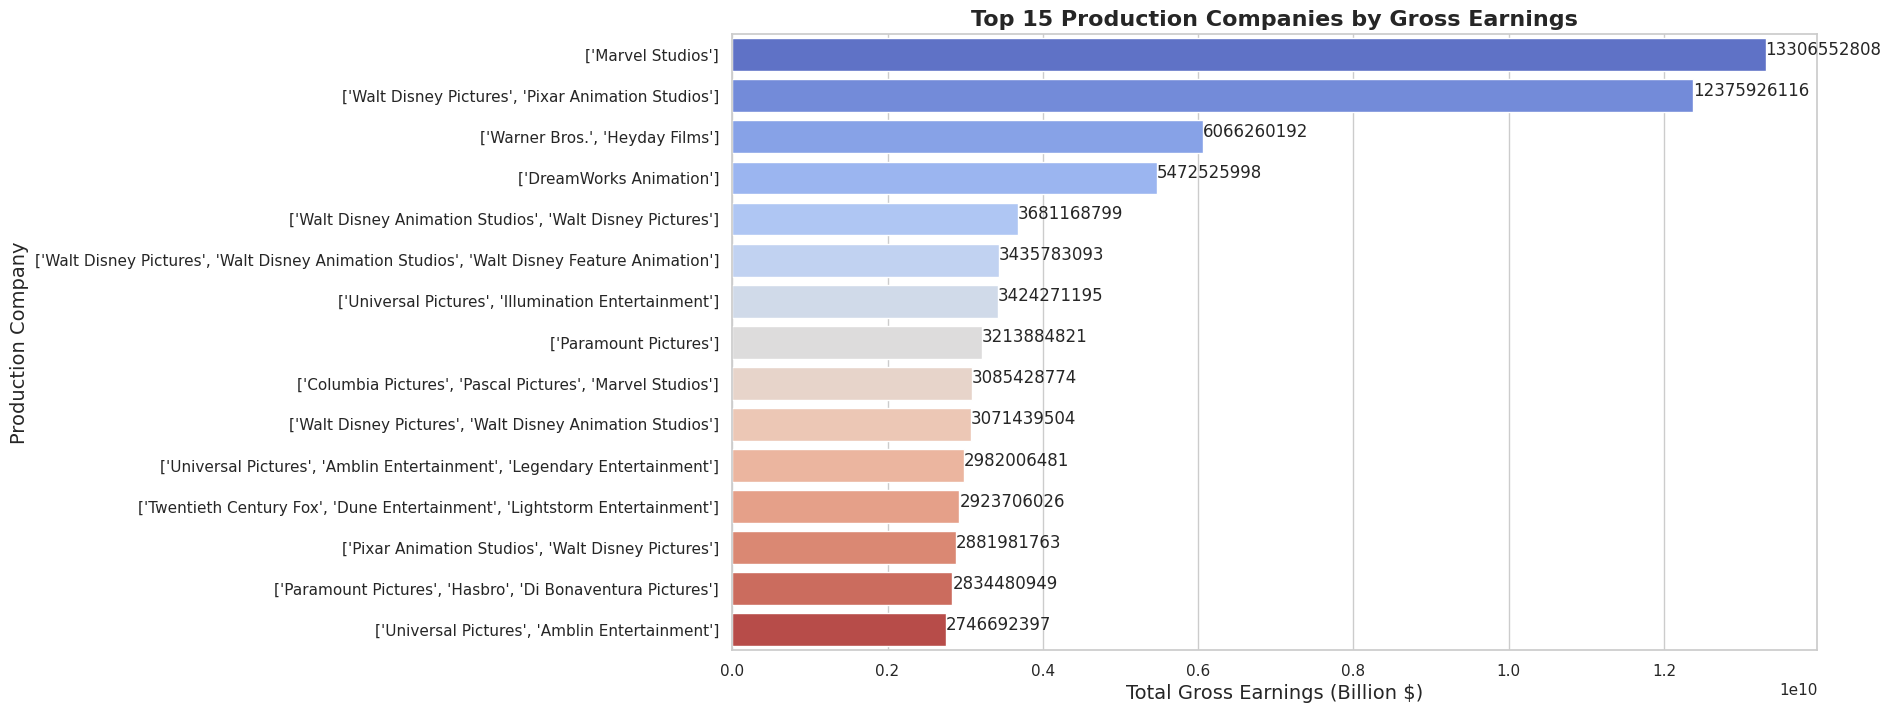

In [75]:
top_production_companies = data.groupby("production_companies")['grossWorldWide'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_production_companies.values, y=top_production_companies.index, palette='coolwarm')

plt.title("Top 15 Production Companies by Gross Earnings", fontsize=16, fontweight="bold")
plt.xlabel("Total Gross Earnings (Billion $)", fontsize=14)
plt.ylabel("Production Company", fontsize=14)

for index, value in enumerate(top_production_companies.values):
    plt.text(value + 10, index, str(int(value)), fontsize=12)

plt.show()


## Dashboard

In [77]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [79]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

# Load Data
data = pd.read_csv("/kaggle/input/top-500-600-movies-of-each-year-from-1960-to-2024/final_dataset.csv")


# Initialize the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("🎬 Movie Data Dashboard", style={'textAlign': 'center'}),
    
    dcc.Tabs([
        dcc.Tab(label='Top 15 Movies by Gross', children=[
            dcc.Graph(id='top-movies')
        ]),
        dcc.Tab(label='Movies Count by Country', children=[
            dcc.Graph(id='movies-by-country')
        ]),
        dcc.Tab(label='Rating Distribution', children=[
            dcc.Graph(id='rating-dist')
        ]),
        dcc.Tab(label='Budget vs Gross Earnings', children=[
            dcc.Graph(id='budget-gross')
        ]),
        dcc.Tab(label='Oscars vs Gross Earnings', children=[
            dcc.Graph(id='oscars-gross')
        ])
    ])
])

# Callbacks
@app.callback(
    Output('top-movies', 'figure'),
    Input('top-movies', 'id')
)
def update_top_movies(_):
    top_movies = data[['Title', 'grossWorldWide']].dropna().sort_values(by='grossWorldWide', ascending=False).head(15)
    fig = px.bar(top_movies, x='grossWorldWide', y='Title', orientation='h', title='Top 15 Movies by Gross Earnings')
    return fig

@app.callback(
    Output('movies-by-country', 'figure'),
    Input('movies-by-country', 'id')
)
def update_movies_by_country(_):
    top_countries = data['countries_origin'].value_counts().head(15)
    fig = px.bar(x=top_countries.index, y=top_countries.values, title='Top 15 Countries by Movie Production')
    return fig

@app.callback(
    Output('rating-dist', 'figure'),
    Input('rating-dist', 'id')
)
def update_rating_distribution(_):
    fig = px.histogram(data, x='Rating', nbins=20, title='Movie Rating Distribution', marginal='box')
    return fig

@app.callback(
    Output('budget-gross', 'figure'),
    Input('budget-gross', 'id')
)
def update_budget_vs_gross(_):
    fig = px.scatter(data, x='budget', y='grossWorldWide', log_x=True, log_y=True, title='Budget vs Gross Earnings')
    return fig

@app.callback(
    Output('oscars-gross', 'figure'),
    Input('oscars-gross', 'id')
)
def update_oscars_vs_gross(_):
    fig = px.scatter(data, x='oscars', y='grossWorldWide', title='Oscars Won vs Gross Earnings')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
